In [16]:
import numpy as np
import pandas as pd

In [17]:
df= pd.read_csv("spam.csv",encoding='latin-1')

In [18]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [19]:
df.shape

(5572, 5)

# Data Cleaning

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [21]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [22]:
df.sample(5)

,v1,v2
4625,ham,Lol ... I knew that .... I saw him in the doll...
65,spam,"As a valued customer, I am pleased to advise y..."
5390,ham,Nt joking seriously i told
2830,ham,Thanx 4 sending me home...
3400,ham,Thanks honey. Have a great day.


In [23]:
# renaming the cols
df.rename(columns={'v1':'Category','v2':'Message'},inplace=True)
df.sample(5)

,Category,Message
933,ham,What time you think you'll have it? Need to kn...
2908,spam,URGENT! Your Mobile number has been awarded wi...
2941,ham,"Hello. No news on job, they are making me wait..."
2631,spam,"URGENT! Your mobile No 077xxx WON a å£2,000 Bo..."
5044,ham,We have sent JD for Customer Service cum Accou...


In [24]:
df.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [26]:
encoder.fit_transform(df['Category'])

array([0, 0, 1, ..., 0, 0, 0])

In [27]:
df['Category']=encoder.fit_transform(df['Category'])

In [28]:
df.head(10)


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [29]:

df.isnull().sum()

Category    0
Message     0
dtype: int64

In [30]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [31]:
df.duplicated().sum()

np.int64(403)

In [32]:
df.drop_duplicates(keep='first')

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [33]:
df=df.drop_duplicates(keep='first')

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
df.shape

(5169, 2)

## EDA



In [36]:
df.head()


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df['Category'].value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

In [38]:
df.shape

(5169, 2)

In [39]:
index_to_drop = df[df['Category'] == 2].index

In [40]:
#Dropping category 2
df = df.drop(index=index_to_drop)

In [41]:
df['Category'].value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

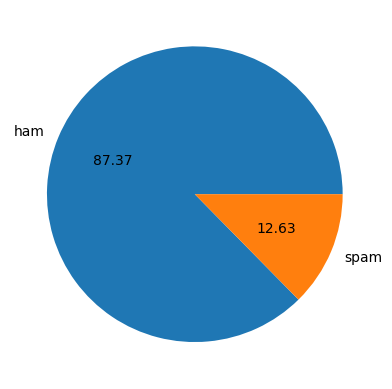

In [42]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [43]:
import nltk

In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sandip
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
#counting character in sentences.
df['Message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Message, Length: 5169, dtype: int64

In [46]:
df['Total char']=df['Message'].apply(len)

In [47]:
df.head()

,Category,Message,Total char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
df.head()

,Category,Message,Total char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [49]:
df['Total word']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [50]:
df.head()

,Category,Message,Total char,Total word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [51]:
df['Total sent']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [52]:
df.head()

,Category,Message,Total char,Total word,Total sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [53]:
df[['Total char','Total word','Total sent']].describe()

,Total char,Total word,Total sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [54]:
#For ham
df[df['Category']==0][['Total char','Total word','Total sent']].describe()

,Total char,Total word,Total sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [55]:
#For spam
df[df['Category']==1][['Total char','Total word','Total sent']].describe()

,Total char,Total word,Total sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [56]:
import seaborn as sns

<Axes: xlabel='Total char', ylabel='Count'>

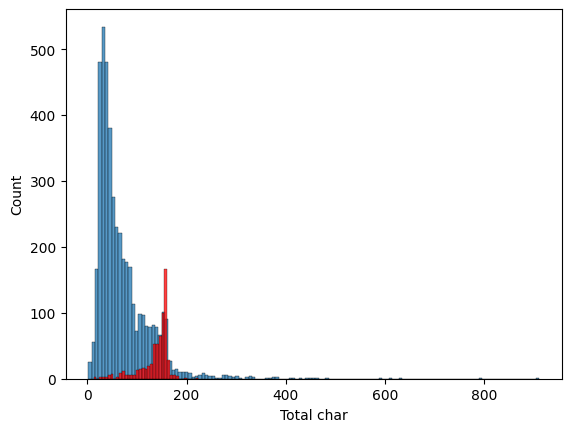

In [57]:
sns.histplot(df[df['Category']==0]['Total char'])
sns.histplot(df[df['Category']==1]['Total char'],color='red')

<Axes: xlabel='Total word', ylabel='Count'>

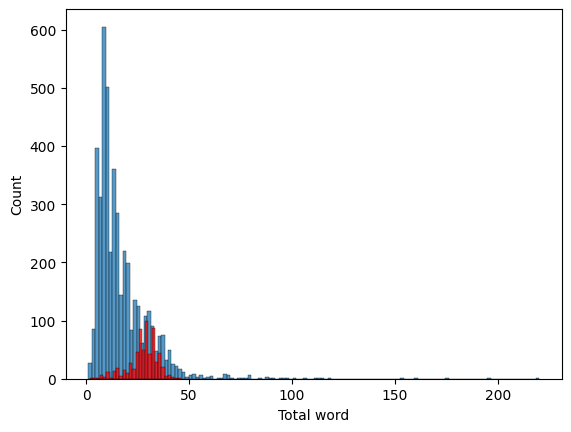

In [58]:
sns.histplot(df[df['Category']==0]['Total word'])
sns.histplot(df[df['Category']==1]['Total word'],color='red')

<Axes: xlabel='Total sent', ylabel='Count'>

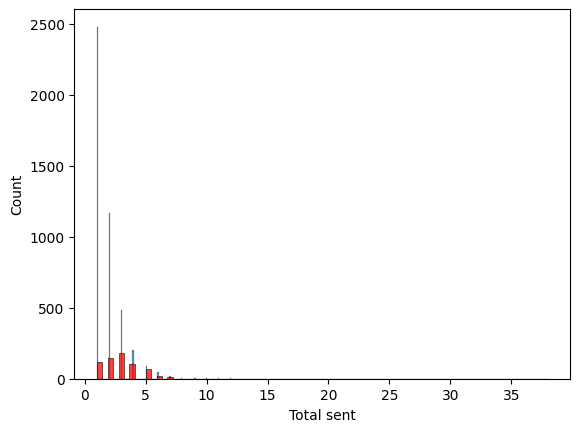

In [59]:
sns.histplot(df[df['Category']==0]['Total sent'])
sns.histplot(df[df['Category']==1]['Total sent'],color='red')

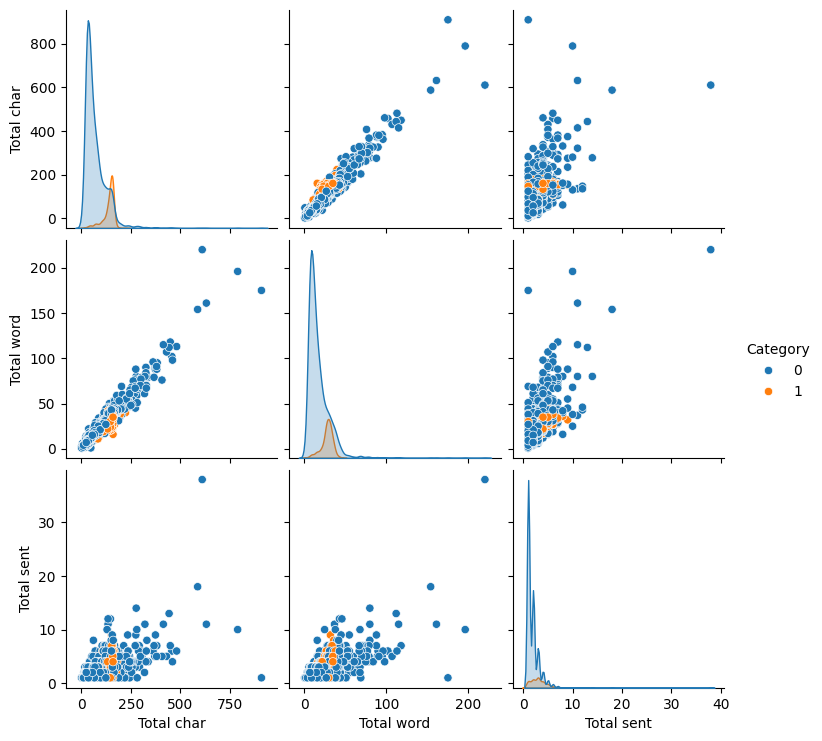

In [60]:
sns.pairplot(df,hue='Category')

<Axes: >

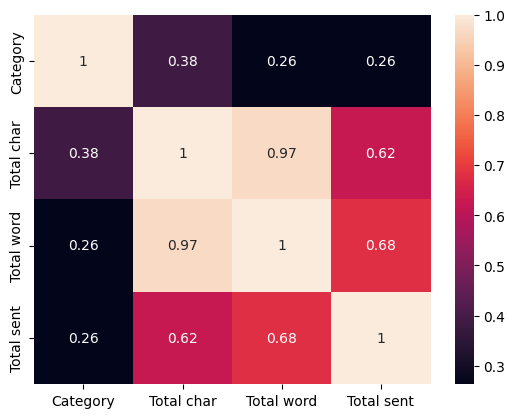

In [61]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

##Data Preprocessing
1.Lower case
2.Text tokenization
3.Removing special characters
4.Removing stop words and punctuation
5.stemming


In [62]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import string
ps = PorterStemmer()

In [63]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
      text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
      text=y[:]
  y.clear()
  for i in text:
      y.append(ps.stem(i))
  return " ".join(y)

In [64]:
df['Transformed_Message']=df['Message'].apply(transform_text)

In [65]:
df.head()

,Category,Message,Total char,Total word,Total sent,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model building


In [92]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [93]:
X = tfidf.fit_transform(df['Transformed_Message']).toarray()

In [94]:
X.shape

(5169, 3000)

In [95]:
y = df['Category'].values

In [96]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [99]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [88]:
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [89]:
GNB.fit(X_train,y_train)
y_pred1 = GNB.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


In [102]:
MNB.fit(X_train,y_train)
y_pred1 = MNB.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [91]:
BNB.fit(X_train,y_train)
y_pred1 = BNB.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## We will use MultinomialNB because it has the highest precision score.

In [103]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(MNB,open('model.pkl','wb'))